# 1. IMPORTING ESSENTIAL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout , BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# 2. LOADING THE DATA

In [2]:
#loading the names of all the features
features = []
with open ("C:\\Users\\Pushkar\\Human activity recognition\\HAR\\UCI_HAR_Dataset\\features.txt") as feat:
    for i in feat:
        features.append(i.splitlines()[0])
        



# Loading the train data into pandas dataframe.
df_train = pd.read_csv("C:\\Users\\Pushkar\\Human activity recognition\\HAR\\UCI_HAR_Dataset\\train\\X_train.txt",delim_whitespace=True, header=None, names=features)

# Adding subject_train column:
subjects = []
with open ("C:\\Users\\Pushkar\\Human activity recognition\\HAR\\UCI_HAR_Dataset\\train\\subject_train.txt") as subs:
    for i in subs:
        subjects.append(i.splitlines()[0])
df_train["subjects"] = subjects

# Adding class label to train data:
class_labels = []
with open ("C:\\Users\\Pushkar\\Human activity recognition\\HAR\\UCI_HAR_Dataset\\train\\y_train.txt") as labels:
    for i in labels:
        class_labels.append(i.splitlines()[0])
df_train["class"] = class_labels





#loading the test data into pandas dataframe.
df_test = pd.read_csv("C:\\Users\\Pushkar\\Human activity recognition\\HAR\\UCI_HAR_Dataset\\test\\X_test.txt",delim_whitespace=True, header=None, names=features)

#Adding subject_test column:
subjects = []
with open ("C:\\Users\\Pushkar\\Human activity recognition\\HAR\\UCI_HAR_Dataset\\test\\subject_test.txt") as subs:
    for i in subs:
        subjects.append(i.splitlines()[0])
df_test["subjects"] = subjects

#Adding class label to test data:
class_labels = []
with open ("C:\\Users\\Pushkar\\Human activity recognition\\HAR\\UCI_HAR_Dataset\\test\\y_test.txt") as labels:
    for i in labels:
        class_labels.append(i.splitlines()[0])
df_test["class"] = class_labels

In [3]:
print("No. of datapoints for training data: ", df_train.shape[0])
print("No. of datapoints for testing data: ", df_test.shape[0])
print("Number of features: ",len(features))

No. of datapoints for training data:  7352
No. of datapoints for testing data:  2947
Number of features:  561


In [4]:
print("No. of subjects for training: ",len(df_train.subjects.unique()))
print("No. of subjects for testing: ",len(df_test.subjects.unique()))

No. of subjects for training:  21
No. of subjects for testing:  9


# 3. DATA CLEANING

### Checking for missing values: 

In [5]:
print("Missing values in train data: ",df_train.isnull().values.sum()) 
print("Missing values in test data: ",df_test.isnull().values.sum()) 

Missing values in train data:  0
Missing values in test data:  0


### Checking for duplicated rows:

In [6]:
print("Duplicated values in train data: ",df_train.duplicated().sum()) 
print("Duplicated values in test data: ",df_test.duplicated().sum()) 

Duplicated values in train data:  0
Duplicated values in test data:  0


# 4. CHECKING CLASS IMBALANCE

Classes are as follows:
1. WALKING
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING 

For convenience, lets switch class labels to actual names.

In [7]:
df_train["activity"] = df_train["class"].map({"1": 'WALKING', "2":'WALKING_UPSTAIRS',"3":'WALKING_DOWNSTAIRS',
                                           "4":'SITTING', "5":'STANDING',"6":'LAYING'})
df_test["activity"] = df_test["class"].map({"1": 'WALKING', "2":'WALKING_UPSTAIRS',"3":'WALKING_DOWNSTAIRS',
                                         "4":'SITTING', "5":'STANDING',"6":'LAYING'})

In [8]:
df_train

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",subjects,class,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS



********** THIS IS HORIZONTAL BAR GRAPH SHOWING % OF EACH ACTIVITIES IN TRAINING SET **********



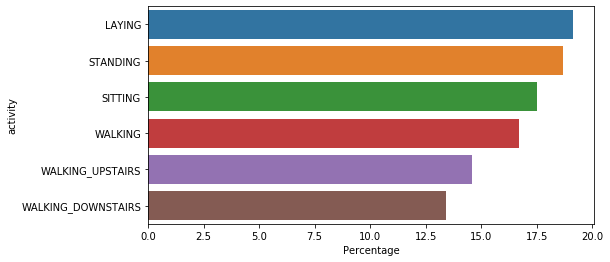

In [9]:
print("")
print("*"*10,"THIS IS HORIZONTAL BAR GRAPH SHOWING % OF EACH ACTIVITIES IN TRAINING SET","*"*10)
print("")
bar_df= pd.DataFrame(df_train["activity"].value_counts()*100/df_train.shape[0])
bar_df.reset_index(drop=False, inplace=True)
bar_df.rename(columns = {"index":"activity","activity":"Percentage"}, inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x= bar_df["Percentage"], y= bar_df["activity"], orient="h")
plt.show()


********** THIS IS HORIZONTAL BAR GRAPH SHOWING % OF EACH ACTIVITIES IN TESTING SET **********



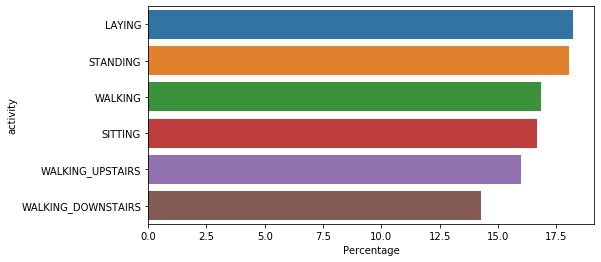

In [10]:
print("")
print("*"*10,"THIS IS HORIZONTAL BAR GRAPH SHOWING % OF EACH ACTIVITIES IN TESTING SET","*"*10)
print("")
bar_df= pd.DataFrame(df_test["activity"].value_counts()*100/df_test.shape[0])
bar_df.reset_index(drop=False, inplace=True)
bar_df.rename(columns = {"index":"activity","activity":"Percentage"}, inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x= bar_df["Percentage"], y= bar_df["activity"], orient="h")
plt.show()

Conclusion: There doesn't seem to be much of an imbalance in classes.

# 5. EDA 

### A. Univariate analysis : Means of magnitudes.

In [11]:
sns.set_style("dark")

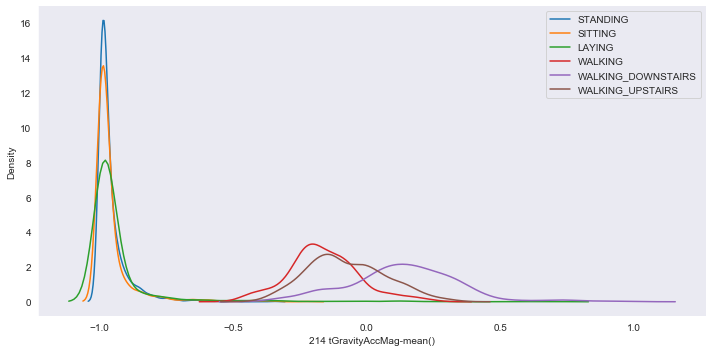

In [12]:
facetgrid = sns.FacetGrid(df_train, hue='activity', height=5,aspect=2)
facetgrid.map(sns.kdeplot, "214 tGravityAccMag-mean()")
plt.legend()

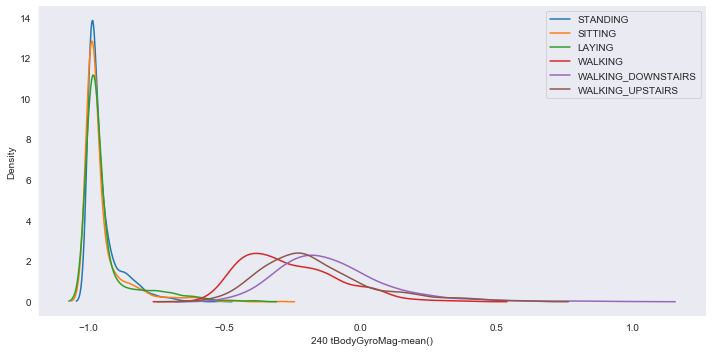

In [13]:
facetgrid = sns.FacetGrid(df_train, hue='activity', height=5,aspect=2)
facetgrid.map(sns.kdeplot, "240 tBodyGyroMag-mean()")
plt.legend()

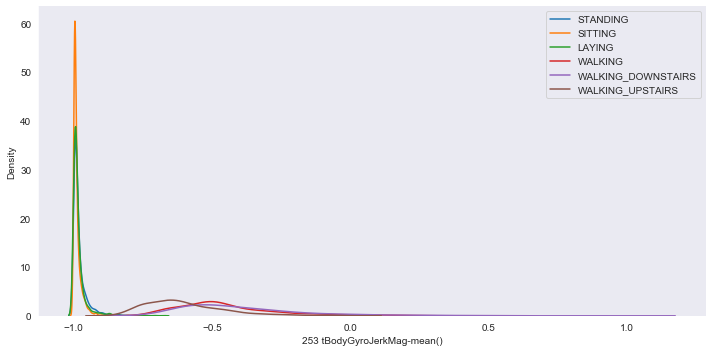

In [14]:
facetgrid = sns.FacetGrid(df_train, hue='activity', height=5,aspect=2)
facetgrid.map(sns.kdeplot, "253 tBodyGyroJerkMag-mean()")
plt.legend()

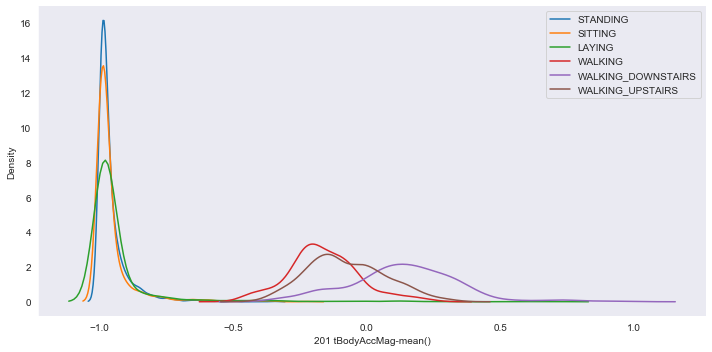

In [15]:
facetgrid = sns.FacetGrid(df_train, hue='activity', height=5,aspect=2)
facetgrid.map(sns.kdeplot, "201 tBodyAccMag-mean()")
plt.legend()
#plt.xlim([0.1,0.5])

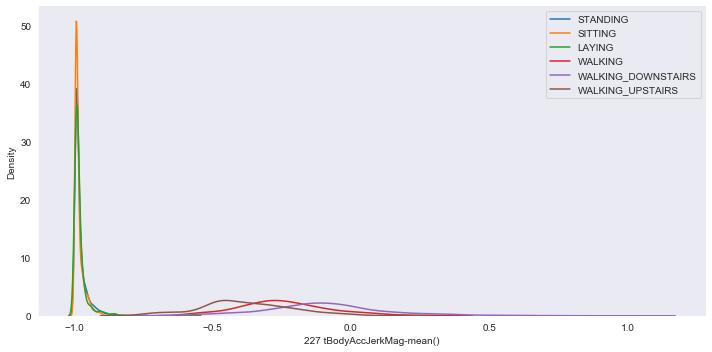

In [16]:
facetgrid = sns.FacetGrid(df_train, hue='activity', height=5,aspect=2)
facetgrid.map(sns.kdeplot, "227 tBodyAccJerkMag-mean()")
plt.legend()

### from above 5 graphs, a clear differenciation between static and dynamic acitivities can be seen.

## B. Bivariate analysis

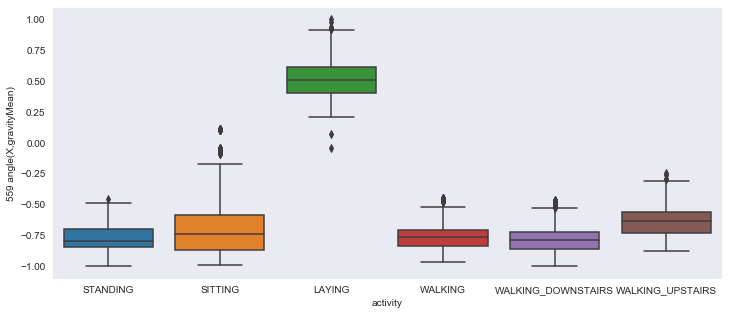

In [17]:
plt.figure(figsize=(12,5))
sns.boxplot(x='activity', y='559 angle(X,gravityMean)', data = df_train)

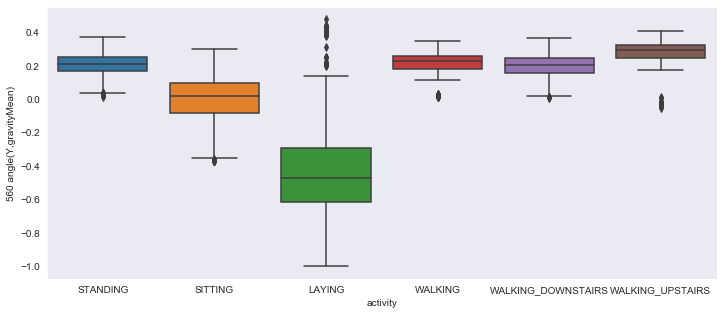

In [18]:
plt.figure(figsize=(12,5))
sns.boxplot(x='activity', y='560 angle(Y,gravityMean)', data = df_train)

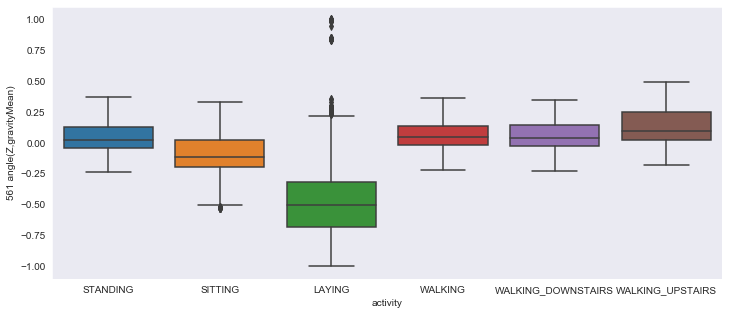

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(x='activity', y='561 angle(Z,gravityMean)', data = df_train)

Above three figures show angles with various axes. Laying can be differenciated from others clearly.

# 6. MLP MODEL ON ENGINEERED FEATURES 

In [20]:
# using the expert features

In [21]:
x_train = df_train.iloc[:,0:-3]
y_train = df_train["class"]
x_test = df_test.iloc[:,0:-3]
y_test = df_test["class"]

In [22]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [23]:
x_train.shape

(7352, 561)

In [24]:
epochs = 30
batch_size = 16

In [25]:
model = Sequential()
model.add(Dense(128, activation = "relu", input_shape=(561,)))
model.add(BatchNormalization())   # Adding batch normalization
model.add(Dropout(0.5))  # Adding a dropout layer
model.add(Dense(64, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Adding a dense output layer with softmax activation
model.add(Dense(6, activation='softmax'))
#model.summary()

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_test, y_test), epochs=epochs)

Epoch 1/30
460/460 [==============================] - 1s 2ms/step - loss: 0.8114 - accuracy: 0.6956 - val_loss: 0.3611 - val_accuracy: 0.8527
Epoch 2/30
460/460 [==============================] - 1s 2ms/step - loss: 0.3721 - accuracy: 0.8592 - val_loss: 0.3928 - val_accuracy: 0.8412
Epoch 3/30
460/460 [==============================] - 1s 1ms/step - loss: 0.3003 - accuracy: 0.8897 - val_loss: 0.2209 - val_accuracy: 0.9155
Epoch 4/30
460/460 [==============================] - 1s 1ms/step - loss: 0.2654 - accuracy: 0.8981 - val_loss: 0.2497 - val_accuracy: 0.8928
Epoch 5/30
460/460 [==============================] - 1s 1ms/step - loss: 0.2434 - accuracy: 0.9082 - val_loss: 0.1823 - val_accuracy: 0.9321
Epoch 6/30
460/460 [==============================] - 1s 1ms/step - loss: 0.2177 - accuracy: 0.9212 - val_loss: 0.3613 - val_accuracy: 0.8646
Epoch 7/30
460/460 [==============================] - 1s 1ms/step - loss: 0.2020 - accuracy: 0.9266 - val_loss: 0.3235 - val_accuracy: 0.8649
Epoch 

# 6. LSTM MODEL ON RAW SIGNALS

### First we have to load the data in appropriate format. 

In [28]:
def reading_file(Type,feature_list):
    df_3d_list = []
    for feature in feature_list:
        df_temp = pd.read_csv("C:\\Users\\Pushkar\\Human activity recognition\\HAR\\UCI_HAR_Dataset\\{}\\Inertial Signals\\{}_{}.txt".format(Type,feature,Type), delim_whitespace=True, header=None)
        df_3d_list.append(df_temp.values)
    return df_3d_list


In [29]:
#loading the data
feature_list = ["body_acc_x","body_acc_y","body_acc_z", "body_gyro_x","body_gyro_y",
                "body_gyro_z","total_acc_x","total_acc_y","total_acc_z"]
#training data
train_data = reading_file("train",feature_list)

#testing data
test_data = reading_file("test",feature_list)

In [30]:
#lets check shape
print("Shape of training data: ",np.array(train_data).shape)
print("Shape of testing data: ",np.array(test_data).shape)

Shape of training data:  (9, 7352, 128)
Shape of testing data:  (9, 2947, 128)


Since the arrangement of data is as follows:

We have 10000 readings, 7352 for training and remaining for testing.
In each such reading, we have 9 vectors, each vector being 128 dimensional.

Therefore, we will transpose our array in a following way:

In [31]:
#transpose
train_data = np.transpose(train_data,(1,2,0))
test_data = np.transpose(test_data,(1,2,0))

In [32]:
print("Shape of training data: ",train_data.shape)
print("Shape of testing data: ",test_data.shape)

Shape of training data:  (7352, 128, 9)
Shape of testing data:  (2947, 128, 9)


In [33]:
#getting class labels 

#for training data
labels_train = pd.read_csv("C:\\Users\\Pushkar\\Human activity recognition\\HAR\\UCI_HAR_Dataset\\train\\y_train.txt", delim_whitespace=True , header= None)
y_train = pd.get_dummies(labels_train.loc[:,0]).values

#for testing data
labels_test = pd.read_csv("C:\\Users\\Pushkar\\Human activity recognition\\HAR\\UCI_HAR_Dataset\\test\\y_test.txt", delim_whitespace=True , header= None)
y_test = pd.get_dummies(labels_test.loc[:,0]).values

In [34]:
train_data.shape

(7352, 128, 9)

In [35]:
#initializing parameters
epochs = 30
batch_size = 16

In [36]:
timesteps = train_data.shape[1]
input_dim = train_data.shape[2]
print(timesteps)
print(input_dim)

128
9


In [37]:
model = Sequential()
# Configuring the parameters
model.add(LSTM(32, input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())  #adding batch normalization
model.add(Dropout(0.3)) # Adding a dropout layer
model.add(Dense(32, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# Adding a dense output layer with softmax activation
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5376      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
model.fit(train_data,y_train,batch_size=batch_size,validation_data=(test_data, y_test),epochs=30)

Epoch 1/30
460/460 [==============================] - 14s 27ms/step - loss: 1.1513 - accuracy: 0.5513 - val_loss: 0.8287 - val_accuracy: 0.6420
Epoch 2/30
460/460 [==============================] - 11s 23ms/step - loss: 0.7328 - accuracy: 0.6989 - val_loss: 0.8897 - val_accuracy: 0.6278
Epoch 3/30
460/460 [==============================] - 11s 24ms/step - loss: 0.4652 - accuracy: 0.8181 - val_loss: 0.8924 - val_accuracy: 0.7893
Epoch 4/30
460/460 [==============================] - 13s 28ms/step - loss: 0.3352 - accuracy: 0.8913 - val_loss: 0.3087 - val_accuracy: 0.8873
Epoch 5/30
460/460 [==============================] - 12s 25ms/step - loss: 0.2738 - accuracy: 0.9064 - val_loss: 0.3351 - val_accuracy: 0.8907
Epoch 6/30
460/460 [==============================] - 11s 24ms/step - loss: 0.2417 - accuracy: 0.9147 - val_loss: 0.3744 - val_accuracy: 0.8626
Epoch 7/30
460/460 [==============================] - 12s 26ms/step - loss: 0.2307 - accuracy: 0.9203 - val_loss: 0.5207 - val_accuracy:

In [40]:
#plot confusion matrix